##  Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

## Load the Data

In [2]:
bank_data=pd.read_csv(r'C:\Users\hxion\Capstone project 2_Customer Churn Prediction\raw data\BankChurners.csv')
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Here is a description of each column:

|Column||Description|
|---||---|
|CLIENTNUM||Client number. Unique identifier for the customer holding the account|
|Attrition_Flag||Internal event (customer activity) variable -  if the account is closed then Attrited Customer else Existing Customer|
|Customer_Age||Demographic variable - Customer's Age in Years|
|Gender||Demographic variable - M=Male, F=Female|
|Dependent_count||Demographic variable - Number of dependents|
|Education_Level||Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)|
|Marital_Status||Demographic variable - Married, Single, Divorced, Unknown|
|Income_Category||Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K|
|Card_Category||Product Variable - Type of Card (Blue, Silver, Gold, Platinum)|
|Monthsonbook||Period of relationship with bank|
|TotalRelationshipcount||Total no. of products held by the customer|
|MonthsInactive12_mon||No. of months inactive in the last 12 months|
|ContactsCount12_mon||No. of Contacts in the last 12 months|
|Credit_Limit||Credit Limit on the Credit Card|
|TotalRevolvingBal||Total Revolving Balance on the Credit Card|
|AvgOpenTo_Buy||Open to Buy Credit Line (Average of last 12 months)|
|TotalAmtChngQ4Q1||Change in Transaction Amount (Q4 over Q1)|
|TotalTransAmt||Total Transaction Amount (Last 12 months)|
|TotalTransCt||Total Transaction Count (Last 12 months)|
|TotalCtChngQ4Q1||Change in Transaction Count (Q4 over Q1)|
|AvgUtilizationRatio||Average Card Utilization Ratio|
|NaiveBayesClassifier_attribution||Naive Bayes|
|NaiveBayesClassifier_attribution||Naive Bayes|



As per data description we drop the last two columns.

In [3]:
bank_data= bank_data.drop(bank_data.columns[[21,22]], axis=1)
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

 ## Explore the Data

### Check Missing Value

Count the number of missing values in each column and sort them.

In [5]:
missing = pd.concat([bank_data.isnull().sum(), 100 * bank_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%')

,count,%
CLIENTNUM,0,0.0
Total_Trans_Ct,0,0.0
Total_Trans_Amt,0,0.0
Total_Amt_Chng_Q4_Q1,0,0.0
Avg_Open_To_Buy,0,0.0
Total_Revolving_Bal,0,0.0
Credit_Limit,0,0.0
Contacts_Count_12_mon,0,0.0
Months_Inactive_12_mon,0,0.0
Total_Ct_Chng_Q4_Q1,0,0.0


There is no missing data in the dataframe.

### Check Duplicate Value

`CLIENTNUM`is a categorical column, convert its datatype into object.

In [6]:
bank_data['CLIENTNUM'] = bank_data['CLIENTNUM'].astype(str)

Check for duplicate items in the dataframe.

In [7]:
bank_data['CLIENTNUM'].value_counts().head()

720101658    1
710872233    1
708301683    1
721213833    1
716323683    1
Name: CLIENTNUM, dtype: int64

There is no duplicate client's account number. Every client's information is unique. 
Since client number this categorical colum doesn't contribute to customer churn prediction, we can simply drop it.


In [8]:
bank_data= bank_data.drop(bank_data.columns[0], axis=1)
bank_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Check Categorical Features

Check categorical columns consistency.

In [9]:
sel_cols = list(bank_data.select_dtypes(include='object'))
print(sel_cols)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [10]:
bank_data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
bank_data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [12]:
bank_data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [13]:
bank_data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [14]:
bank_data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [15]:
bank_data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

All the categorical colmns seem quite consistent, no cleaning work need to be done.

### Check Numerical Features

Call bank_data's 'describe' method for a statistical summary of the numerical columns

In [16]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


Distributions Of Feature Values

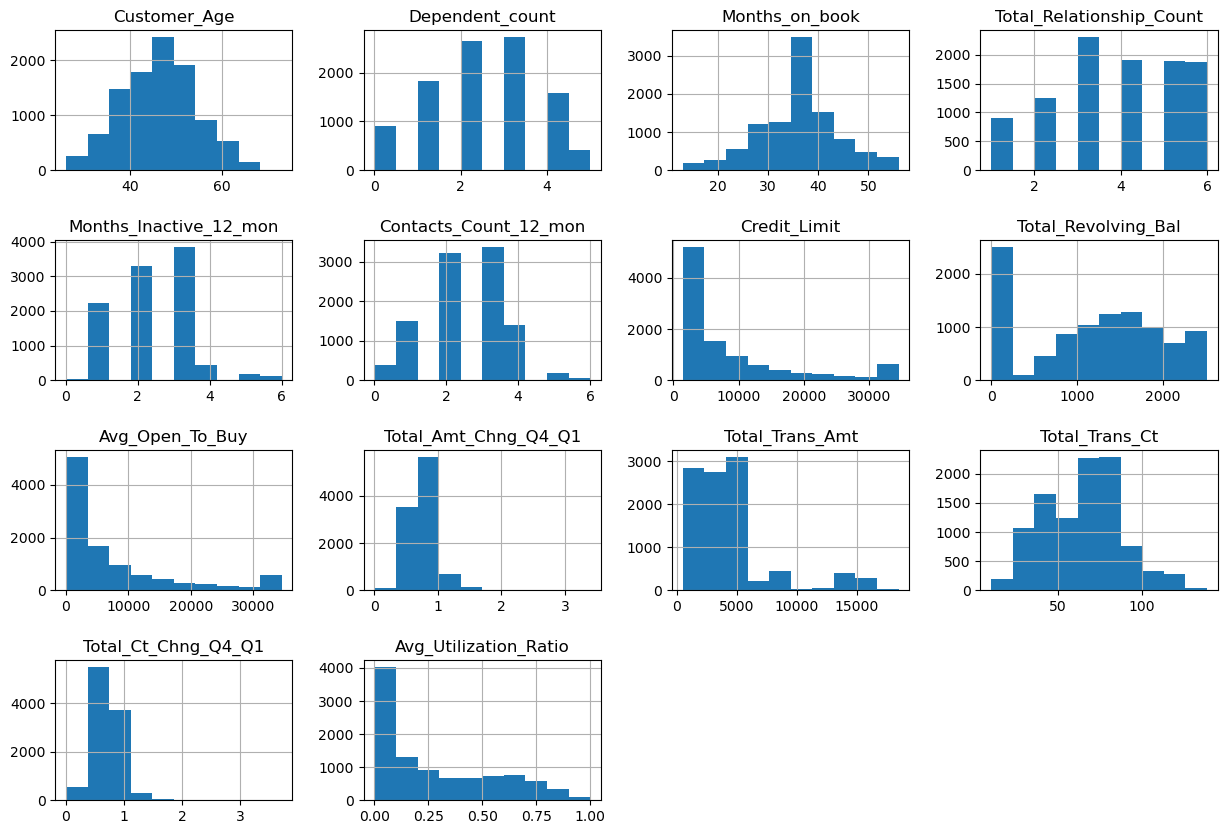

In [17]:
bank_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Looks good, no outlier, no weird value.

## Save the Data

In [18]:
bank_data.shape

(10127, 20)

Save the data to a new csv file.

In [19]:
datapath = '..\data'
save_file(bank_data, 'bank_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "..\data\bank_data_cleaned.csv"


## Summary
This is a relatively clean set of data, with no missing  values, duplicate value, or weired values. Based on the meaning of each column, we dropped off client number column and NaiveBayesClassifier_attribution columns. 		